___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [28]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.compose import make_column_transformer

#Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


import cufflinks as cf
import plotly.express as px
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from termcolor import colored
import missingno as msno 

import colorama
from colorama import Fore, Style
from termcolor import colored

In [4]:
## Useful Functions

###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

#### Load Dataset

In [2]:
df = pd.read_csv("C:\\Users\\ihsankoo\\Desktop\\Clarusway\\Machine Learning\\Customer Segmentation project\\Mall_Customers.csv")
df0 = df.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---
---

In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,117,Female,63,65,43
109,110,Male,66,63,48
0,1,Male,19,15,39
197,198,Male,32,126,74
172,173,Male,36,87,10


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000,100.500,57.879,1.000,50.750,100.500,150.250,200.000
Age,200.000,38.850,13.969,18.000,28.750,36.000,49.000,70.000
Annual Income (k$),200.000,60.560,26.265,15.000,41.500,61.500,78.000,137.000
Spending Score (1-100),200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


In [8]:
df.describe(include=object).T

,count,unique,top,freq
Gender,200,2,Female,112


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [9]:
first_looking(df)

Shape:(200, 5)
There is 200 observation and 5 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
-------------------------------------------------------------------------------
Number of Uniques:
CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64
----------------------------------------------------------

---
---

In [16]:
df = df.rename(columns={"annual_income_(k$)":"annual_income"})
df = df.rename(columns={"spending_score_(1-100)":"spending_score"})

In [17]:
# Target Examination
target = "gender"

print(colored('-'*79, 'red', attrs=['bold']), '\n',
      colored(f"Target(y):", attrs=['bold']), target, 
      colored(f"\nValue Counts:\n", attrs=['underline']), df[target].value_counts(),'\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')

X_columns = df.drop(target, axis=1).columns
X_numerical = df.drop(target, axis=1).select_dtypes('number').astype('float64')
X_categorical = df.drop(target, axis=1).select_dtypes('object')

print(colored(f"Feature Columns:", attrs=['bold']), list(X_columns),'\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')
print(colored(f"Numerical Columns:", attrs=['bold']), list(X_numerical.columns), '\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')
print(colored(f"Categorical Columns:", attrs=['bold']), list(X_categorical.columns), '\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')
print(colored(f"Number of Uniques:", attrs=['bold']), '\n', X_categorical.nunique(), '\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')

-------------------------------------------------------------------------------
Target(y):gender
Value Counts:
Female    112
Male       88
Name: gender, dtype: int64
-------------------------------------------------------------------------------
Feature Columns:['customerid', 'age', 'annual_income', 'spending_score']
-------------------------------------------------------------------------------
Numerical Columns:['customerid', 'age', 'annual_income', 'spending_score']
-------------------------------------------------------------------------------
Categorical Columns:[]
-------------------------------------------------------------------------------
Number of Uniques:
Series([], dtype: float64)
-------------------------------------------------------------------------------


In [18]:
df.drop(columns="customerid", inplace=True)

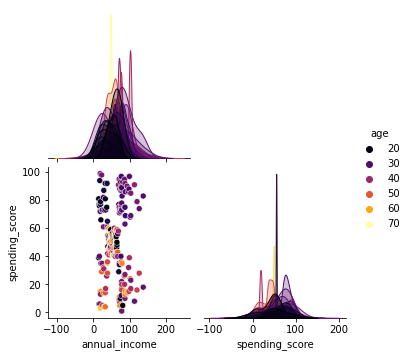

In [22]:
sns.pairplot(df, palette="inferno", hue="age", corner=True)
plt.show()

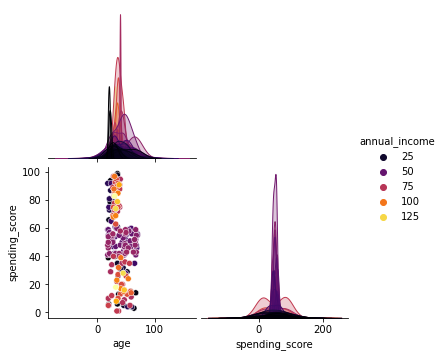

In [23]:
sns.pairplot(df, palette="inferno", hue="annual_income", corner=True)
plt.show()

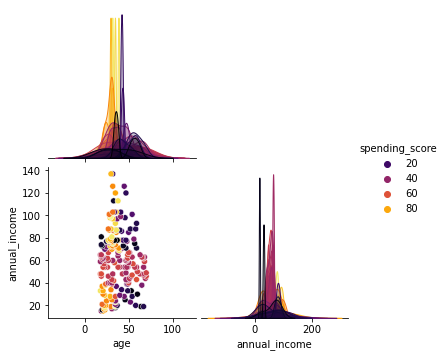

In [25]:
sns.pairplot(df, palette="inferno", hue="spending_score", corner=True)
plt.show()

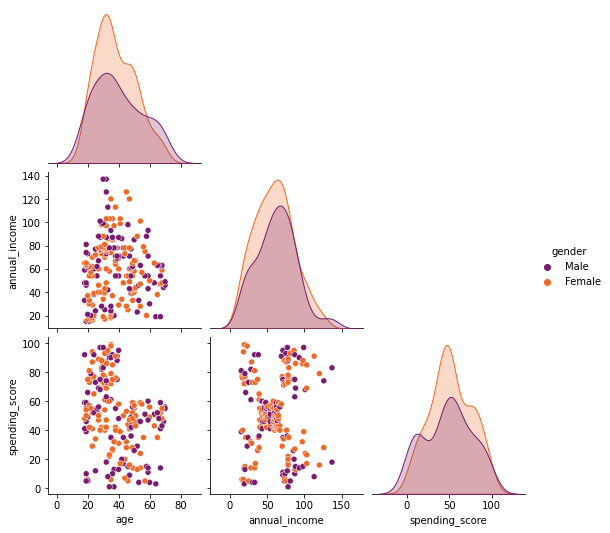

In [26]:
sns.pairplot(df, palette="inferno", hue="gender", corner=True)
plt.show()

In [30]:
fig = px.scatter_3d(df, 
                    x="annual_income",
                    y="spending_score",
                    z="age",
                    color='gender')
fig.show()

In [31]:
df.shape

(200, 4)

In [32]:
X_numerical.iplot(kind='bar')

In [33]:
X_numerical.iplot(kind='histogram',subplots=True,bins=50)

In [35]:
for i in df.drop(columns=[target]).columns:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

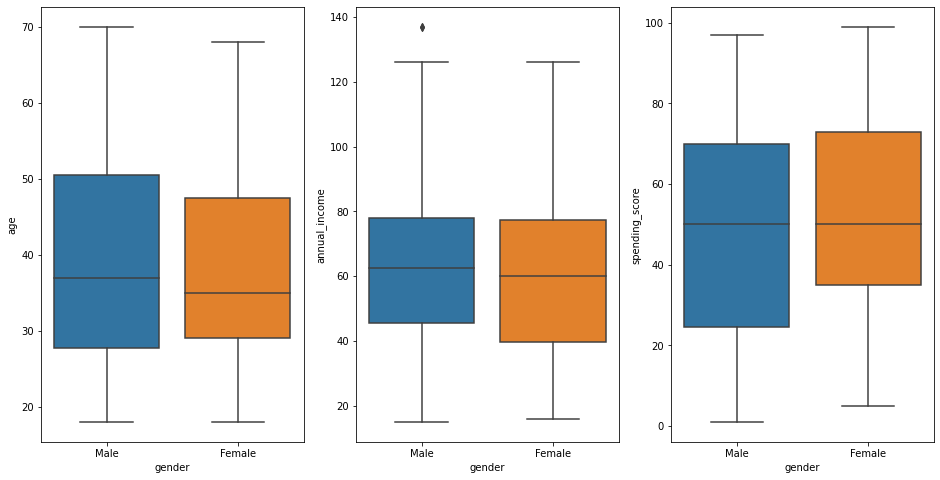

In [36]:
index = 0
plt.figure(figsize=(16, 8))
for feature in df.columns:
    if feature != target:
        index += 1
        plt.subplot(1, 3, index)
        sns.boxplot(x=target, y=feature, data=df)

In [37]:
df.corr().style.background_gradient(cmap='RdPu')

,age,annual_income,spending_score
age,1.000000,-0.012398,-0.327227
annual_income,-0.012398,1.000000,0.009903
spending_score,-0.327227,0.009903,1.000000


In [38]:
X_numerical.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
customerid,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
annual_income,200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
spending_score,200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


In [39]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

age               0.486
annual_income     0.322
spending_score   -0.047
dtype: float64

In [40]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = X_numerical.skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

Series([], dtype: float64)

In [41]:
for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, 
               '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew,
               '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m',
               "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   0.0  means that the distribution is approx.   symmetric 
A skewness value of   0.48556885096681657  means that the distribution is approx.   symmetric 
A skewness value of   0.3218425498619055  means that the distribution is approx.   symmetric 
A skewness value of   -0.047220201374263374  means that the distribution is approx.   symmetric 


In [42]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

annual_income    -0.098
age              -0.672
spending_score   -0.827
dtype: float64

In [43]:
#Calculating Kurtosis 

kurtosis_limit = 7 
# This is our threshold-limit to evaluate skewness.
# Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

Series([], dtype: float64)

In [45]:
df.groupby("age")['annual_income'].mean().sort_values(ascending=False).iplot(kind='bar')

In [47]:
df.groupby("age")['annual_income'].mean().sort_values(ascending=False).nlargest(10)

age
41   101.000
32    87.182
28    85.250
36    81.000
33    80.333
56    79.000
34    79.000
30    76.143
44    75.500
38    74.500
Name: annual_income, dtype: float64

In [49]:
df.groupby("age")['annual_income'].mean().sort_values(ascending=False).nsmallest(10)

age
64   19.000
22   31.333
21   38.800
24   39.250
53   39.500
23   41.500
20   41.600
60   43.333
69   44.000
67   45.500
Name: annual_income, dtype: float64

In [52]:
df.groupby("age")['spending_score'].mean().sort_values(ascending=False).iplot(kind="bar")

In [53]:
df.groupby("age")['spending_score'].mean().sort_values(ascending=False).nlargest(10)

age
39   84.667
30   80.286
29   76.600
24   71.500
22   70.000
28   70.000
21   66.800
32   66.000
35   63.889
31   63.875
Name: spending_score, dtype: float64

In [55]:
df.groupby("age")['spending_score'].mean().sort_values(ascending=False).nsmallest(10)

age
64    3.000
44   13.500
58   15.000
37   15.333
42   18.500
52   21.000
46   21.333
53   25.000
57   28.000
41   28.000
Name: spending_score, dtype: float64

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [57]:
df1 = df.drop(['gender', 'annual_income'], axis=1)
df1.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *ii. Determine optimal number of clusters*

In [64]:
from sklearn.cluster import KMeans

In [65]:
KMeans(random_state = 101).fit_predict(df1)

array([0, 3, 6, 3, 0, 3, 6, 2, 5, 3, 5, 2, 5, 3, 6, 3, 1, 3, 1, 2, 1, 3,
       5, 3, 5, 2, 1, 3, 1, 2, 5, 3, 5, 2, 5, 3, 5, 3, 1, 3, 7, 2, 1, 3,
       1, 3, 4, 0, 0, 0, 4, 3, 0, 7, 4, 4, 4, 7, 0, 4, 7, 0, 7, 4, 7, 0,
       4, 7, 0, 0, 7, 4, 7, 7, 7, 0, 4, 4, 0, 4, 7, 4, 7, 4, 0, 4, 4, 0,
       3, 4, 7, 0, 4, 1, 0, 0, 4, 0, 4, 0, 0, 4, 7, 0, 4, 0, 7, 4, 7, 7,
       7, 0, 1, 0, 0, 0, 7, 4, 4, 4, 0, 1, 4, 2, 1, 3, 1, 2, 5, 3, 5, 3,
       0, 3, 6, 2, 5, 3, 6, 3, 5, 2, 0, 2, 6, 2, 1, 3, 1, 2, 5, 2, 5, 3,
       5, 2, 6, 3, 6, 3, 1, 2, 6, 2, 1, 3, 1, 2, 1, 3, 5, 3, 6, 2, 5, 2,
       5, 3, 5, 2, 1, 2, 5, 2, 1, 2, 5, 3, 5, 2, 1, 3, 6, 2, 5, 3, 1, 3,
       6, 2])

Text(0.5, 1.0, 'elbow method')

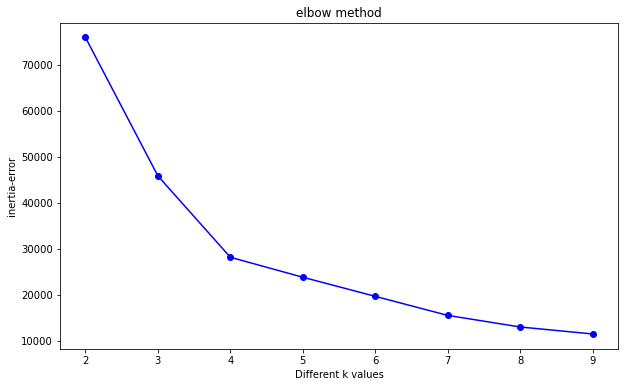

In [66]:
ssd = []
K = range(2,10)
for k in K:
    ssd.append(KMeans(n_clusters =k, random_state=101).fit(df1).inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [67]:
ssd

[75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23818.84825158133,
 19664.73951714552,
 15523.684014328752,
 13002.466488382794,
 11486.150087792641]

In [68]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479
3,17675.093
4,4346.735
5,4154.109
6,4141.056
7,2521.218
8,1516.316


<AxesSubplot:>

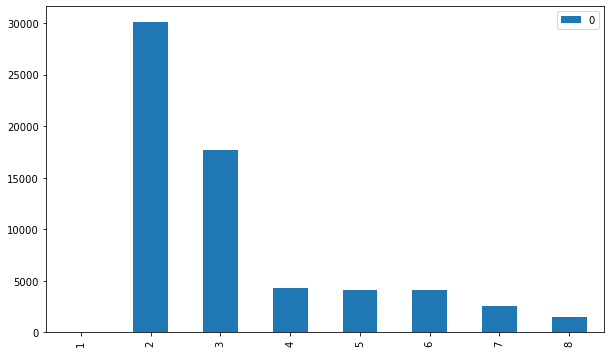

In [70]:
df_diff.plot(kind='bar')

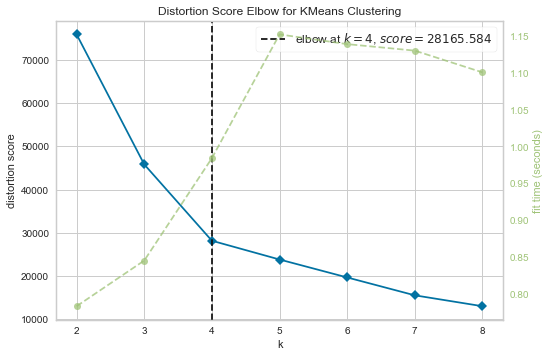

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=101), k=(2,9))
visualizer.fit(df1)        # Fit the data to the visualizer
visualizer.show()

In [72]:
from sklearn.metrics import silhouette_score
silhouette_score(df1, KMeans(random_state = 101).fit_predict(df1))

0.4331607448298594

In [73]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    silhouette_ = silhouette_score(df1, 
                                      KMeans(n_clusters=num_clusters, random_state=101).fit_predict(df1))
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.46342248553207704
For n_clusters=6, the silhouette score is 0.4235290823884998
For n_clusters=7, the silhouette score is 0.4212938931368575
For n_clusters=8, the silhouette score is 0.4331607448298594


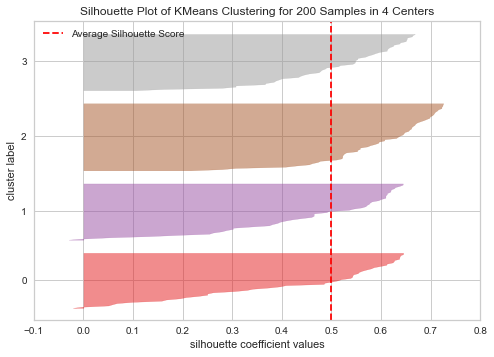

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [74]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=101))
visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof()

#### *iii. Apply K Means*

In [75]:
KMeans(n_clusters =4, random_state=101).fit_predict(df1)

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [76]:
df1["predicted_clusters1_as"] = KMeans(n_clusters =4, random_state=101).fit_predict(df1)
df1

,age,spending_score,predicted_clusters1_as
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0
5,22,76,2
6,35,6,1
7,23,94,2
8,64,3,1
9,30,72,2


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [77]:
df2 = df.drop(['gender', 'age'], axis=1)
df2.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

In [78]:
KMeans(random_state = 101).fit_predict(df2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 7, 3, 7, 7,
       4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 1, 7, 1, 7, 7, 1, 1, 7, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5,
       1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2])

Text(0.5, 1.0, 'elbow method')

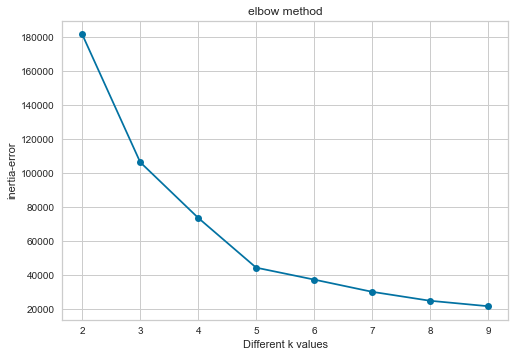

In [79]:
## Elbow Method , we use this method to find optimal k value by looking up to break point of graph.

ssd = []
K = range(2,10)
for k in K:
    ssd.append(KMeans(n_clusters =k, random_state=101).fit(df2).inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [80]:
ssd # sum of squared distance

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37442.24745037571,
 30273.394312070042,
 25011.92025547377,
 21818.11458845218]

In [81]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.223
3,32668.584
4,29231.334
5,7006.208
6,7168.853
7,5261.474
8,3193.806


<AxesSubplot:>

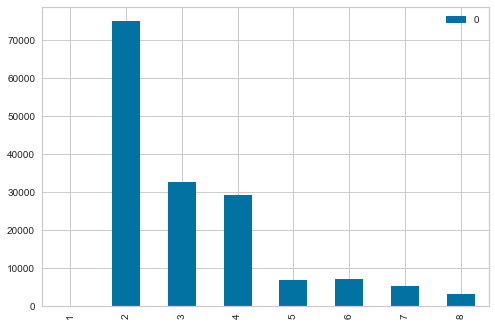

In [83]:
df_diff.plot(kind='bar')

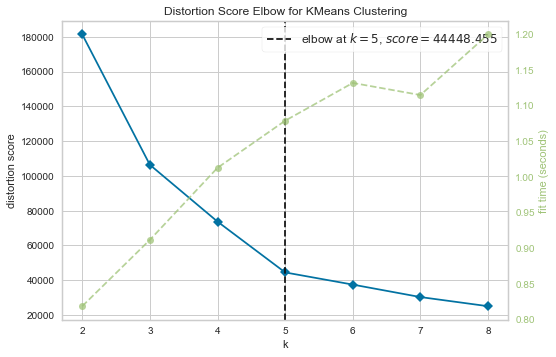

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=101), k=(2,9))
visualizer.fit(df2)        # Fit the data to the visualizer
visualizer.show()

In [85]:
from sklearn.metrics import silhouette_score
silhouette_score(df2, KMeans(random_state = 101).fit_predict(df2))

0.4551839202075395

In [86]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    silhouette_ = silhouette_score(df2, 
                                      KMeans(n_clusters=num_clusters, random_state=101).fit_predict(df2))
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_}")


For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.5367558067779578
For n_clusters=7, the silhouette score is 0.5270287298101395
For n_clusters=8, the silhouette score is 0.4551839202075395


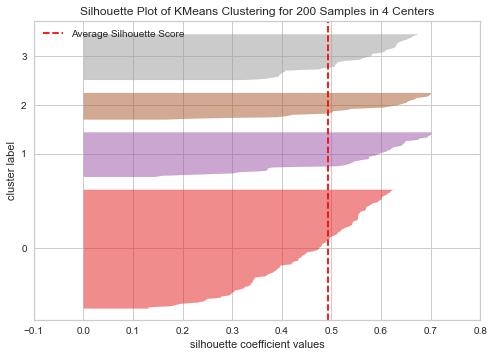

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [87]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=101))
visualizer.fit(df2)    # Fit the data to the visualizer
visualizer.poof()

#### *iii. Apply K Means*

In [88]:
KMeans(n_clusters = 5, random_state=101).fit_predict(df2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [89]:
df2["predicted_clusters2_is"] = KMeans(n_clusters =5, random_state=101).fit_predict(df2)
df2

,annual_income,spending_score,predicted_clusters2_is
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
5,17,76,3
6,18,6,4
7,18,94,3
8,19,3,4
9,19,72,3


### Clustering based on Annual Income and Age

In [101]:
df3 = df.drop(['gender', 'spending_score'], axis=1)
df3.head()

,age,annual_income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [102]:
KMeans(random_state = 101).fit_predict(df3)

array([0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 0,
       7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 6, 7, 6, 7, 6, 6, 6, 7, 6, 7, 6,
       7, 6, 7, 6, 6, 6, 7, 6, 6, 7, 7, 7, 7, 4, 6, 7, 4, 6, 4, 7, 4, 6,
       7, 4, 6, 6, 4, 7, 4, 4, 4, 6, 1, 1, 6, 1, 4, 1, 4, 1, 6, 1, 4, 3,
       1, 1, 4, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 4, 3, 1, 3, 4, 1, 4, 4,
       4, 3, 1, 3, 3, 3, 4, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       5, 5])

Text(0.5, 1.0, 'elbow method')

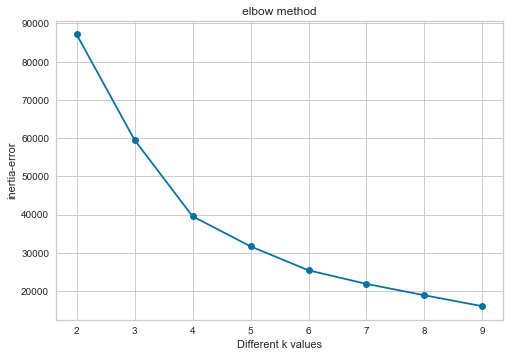

In [103]:
#Elbow Method , we use this method to find optimal k value by looking up to break point of graph.

ssd = []
K = range(2,10)
for k in K:
    ssd.append(KMeans(n_clusters =k, random_state=101).fit(df3).inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [104]:
ssd # sum of squared distance

[87121.56591478697,
 59486.96143928035,
 39529.8879673635,
 31659.353138717815,
 25399.022004416984,
 21839.635516285518,
 18864.876029385057,
 16004.32094098884]

In [105]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,27634.604
3,19957.073
4,7870.535
5,6260.331
6,3559.386
7,2974.759
8,2860.555


<AxesSubplot:>

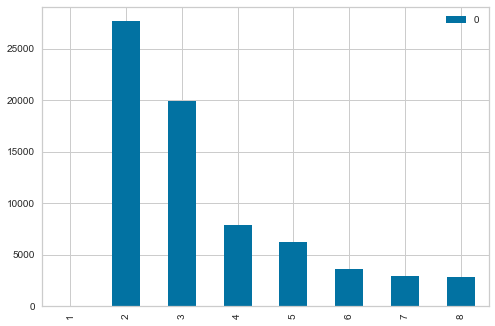

In [106]:
df_diff.plot(kind='bar')

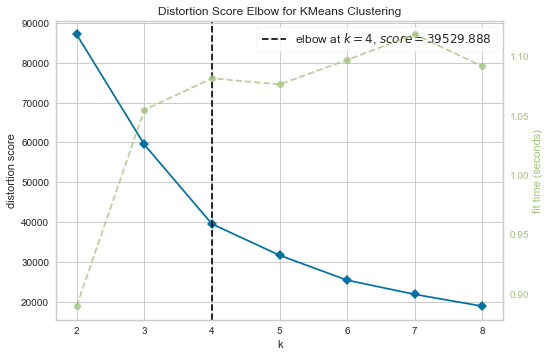

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=101), k=(2,9))
visualizer.fit(df3)        # Fit the data to the visualizer
visualizer.show()

In [108]:
from sklearn.metrics import silhouette_score
silhouette_score(df3, KMeans(random_state = 101).fit_predict(df3))

0.394180001823819

In [109]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    silhouette_ = silhouette_score(df3, 
                                      KMeans(n_clusters=num_clusters, random_state=101).fit_predict(df3))
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_}")

For n_clusters=2, the silhouette score is 0.42620850066216065
For n_clusters=3, the silhouette score is 0.4254725038202792
For n_clusters=4, the silhouette score is 0.43295184273333076
For n_clusters=5, the silhouette score is 0.40157587536205724
For n_clusters=6, the silhouette score is 0.3959805131239844
For n_clusters=7, the silhouette score is 0.3840192204022327
For n_clusters=8, the silhouette score is 0.394180001823819


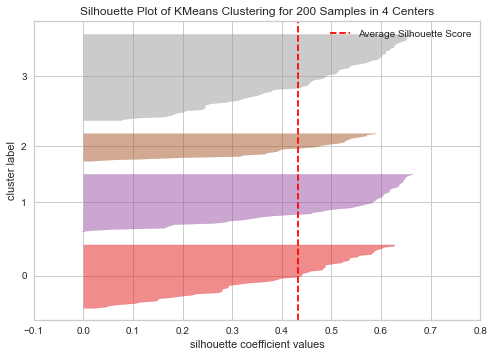

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [110]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=101))
visualizer.fit(df3)    # Fit the data to the visualizer
visualizer.poof()

In [111]:
KMeans(n_clusters =4, random_state=101).fit_predict(df3)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [112]:
df3["predicted_clusters3_ia"] = KMeans(n_clusters =4, random_state=101).fit_predict(df3)
df3

,age,annual_income,predicted_clusters3_ia
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1
5,22,17,1
6,35,18,1
7,23,18,1
8,64,19,0
9,30,19,1


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

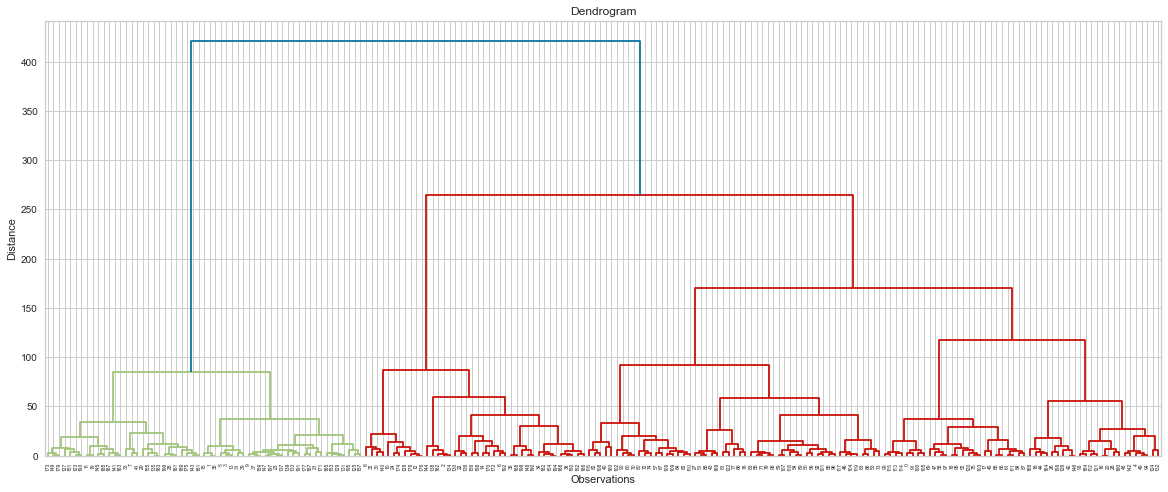

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(df1, method = "ward"), leaf_font_size = 5);

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [262.5, 262.5, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.5],
  [310.0, 310.0, 333.75, 333.75],
  [276.25, 276.25, 321.875, 321.875],
  [221.25, 221.25, 299.0625, 299.0625],
  [173.75, 173.75, 260.15625, 260.15625],
  [150.0, 150.0, 216.953125, 216.953125],
  [122.5, 122.5, 1

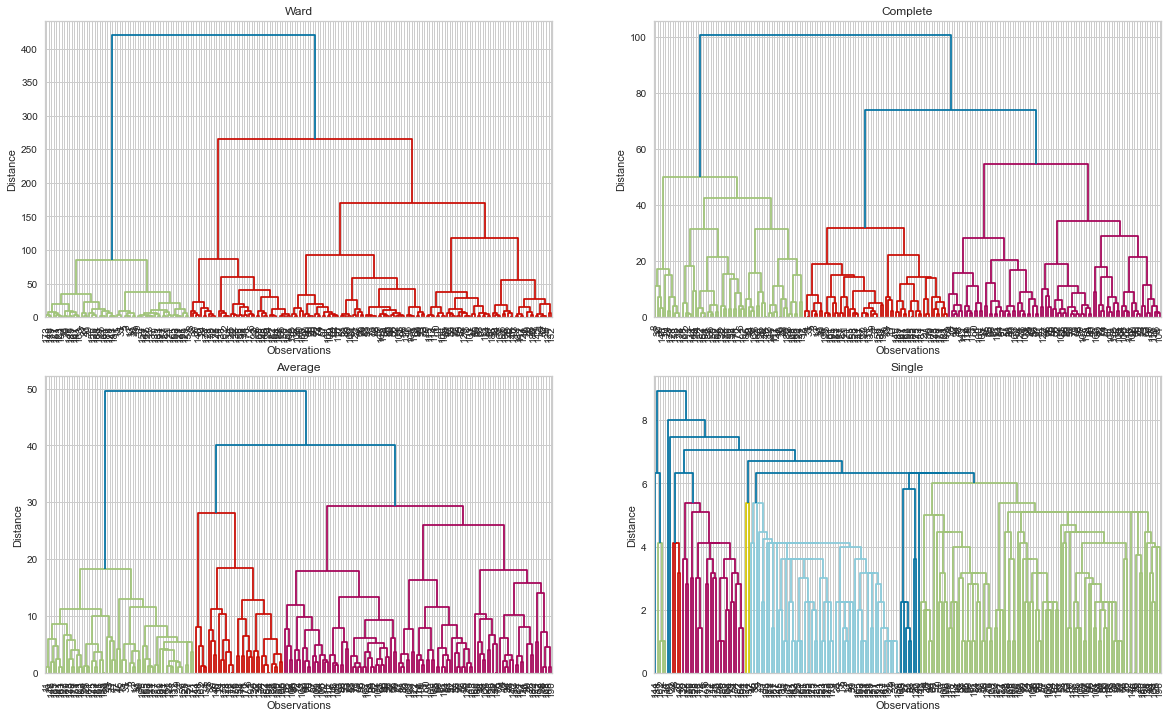

In [91]:
hc_ward = linkage(y = df1, method = "ward")
hc_complete = linkage(df1, "complete")
hc_average = linkage(df1, "average")
hc_single = linkage(df1, "single")

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10)

In [93]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                           affinity='euclidean', 
                                           linkage='ward').fit_predict(df1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model_labels)}')

Silhouette Score for 2 clusters: 0.45454592584148096
Silhouette Score for 3 clusters: 0.4406245222112989
Silhouette Score for 4 clusters: 0.4608405468661758
Silhouette Score for 5 clusters: 0.4043739061256346
Silhouette Score for 6 clusters: 0.4125751937244674
Silhouette Score for 7 clusters: 0.4158018450743115
Silhouette Score for 8 clusters: 0.3881443379710403
Silhouette Score for 9 clusters: 0.39456163701637914


### ii. *Apply Agglomerative Clustering*

In [94]:
model_labels = AgglomerativeClustering(n_clusters = 4,
                                       affinity='euclidean',
                                       linkage='ward').fit_predict(df1)
model_labels

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [96]:
df1["predicted_clusters_hc"] = AgglomerativeClustering(n_clusters = 5,
                                                       affinity='euclidean',
                                                       linkage='ward').fit_predict(df1)

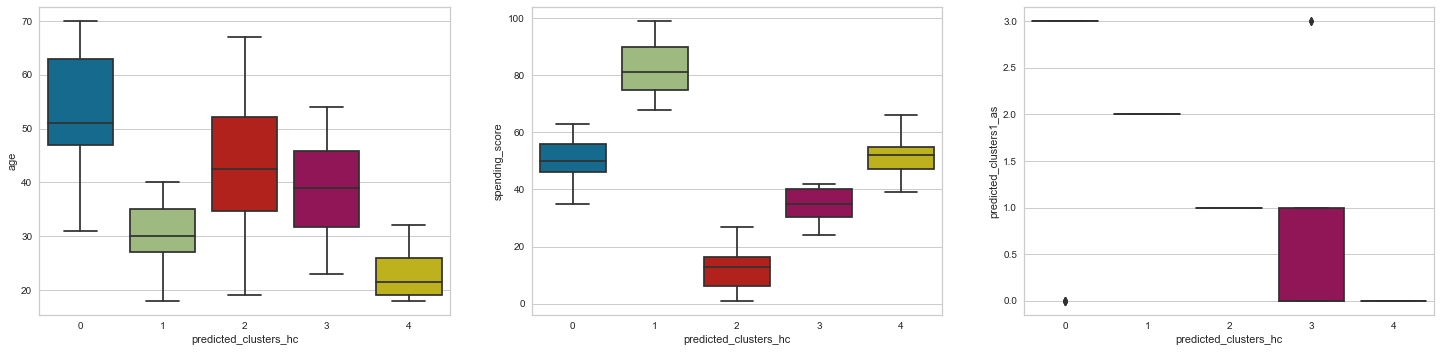

In [97]:
index = 0
plt.figure(figsize=(25, 60))

for feature in df1:
    if feature != "predicted_clusters_hc":
        index += 1
        plt.subplot(9, 3, index)
        sns.boxplot(x='predicted_clusters_hc', y=feature, data=df1)

### Compare all three clusters

In [113]:
a = df1["predicted_clusters1_as"]
b = df2["predicted_clusters2_is"]
c = df3["predicted_clusters3_ia"]


df= df.join([a, b, c])
df

,gender,age,annual_income,spending_score,predicted_clusters1_as,predicted_clusters2_is,predicted_clusters3_ia
0,Male,19,15,39,0,4,1
1,Male,21,15,81,2,3,1
2,Female,20,16,6,1,4,1
3,Female,23,16,77,2,3,1
4,Female,31,17,40,0,4,1
5,Female,22,17,76,2,3,1
6,Female,35,18,6,1,4,1
7,Female,23,18,94,2,3,1
8,Male,64,19,3,1,4,0
9,Female,30,19,72,2,3,1


In [116]:
fig = px.scatter_3d(x=df["age"],
                    y=df["annual_income"],
                    z=df["spending_score"],
                   color=df["predicted_clusters1_as"],
                   labels = {"x": "age",
                             "y": "annual_income",
                             "z": "spending_score"},
                   hover_name=df["gender"])

fig.show()

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

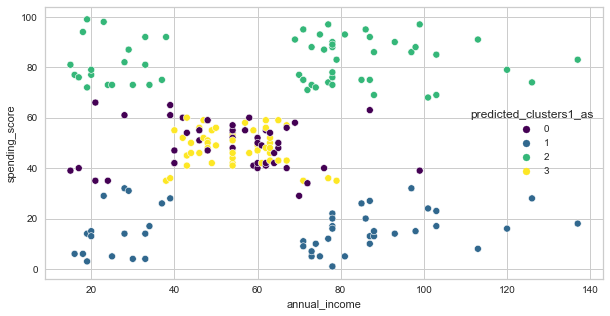

In [118]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["annual_income"], 
                df["spending_score"], hue= df["predicted_clusters1_as"], palette= "viridis")


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

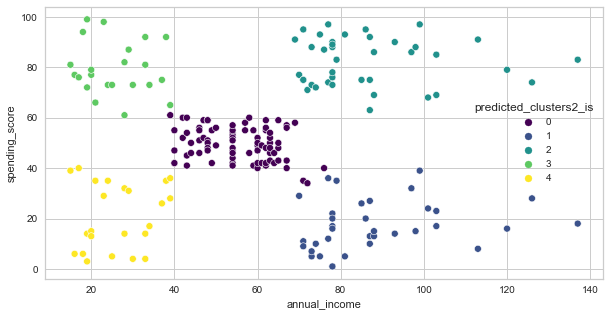

In [119]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["annual_income"], 
                df["spending_score"], hue= df["predicted_clusters2_is"], palette= "viridis")


<AxesSubplot:xlabel='age', ylabel='annual_income'>

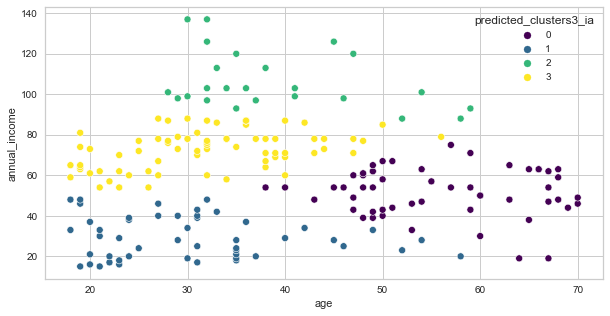

In [121]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["age"],
                df["annual_income"],
                hue= df["predicted_clusters3_ia"], palette= "viridis")

In [122]:
df["predicted_clusters1_as"].value_counts()

2    57
1    48
3    48
0    47
Name: predicted_clusters1_as, dtype: int64

In [123]:
df["predicted_clusters2_is"].value_counts()

0    81
2    39
1    35
4    23
3    22
Name: predicted_clusters2_is, dtype: int64

In [124]:
df["predicted_clusters3_ia"].value_counts()

3    73
0    54
1    49
2    24
Name: predicted_clusters3_ia, dtype: int64

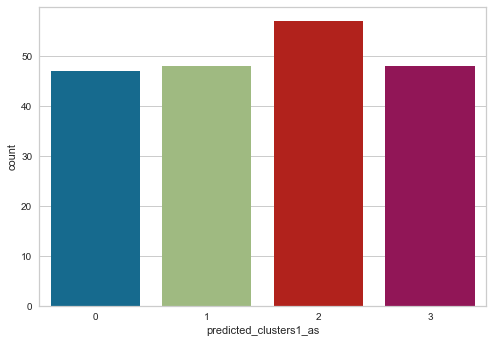

In [126]:
sns.countplot(x=df["predicted_clusters1_as"], data=df1)
plt.show()

### Conclusion

**cluster 0** : The average age is around 55, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annual_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annual_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___